Analyzing Traffic Patterns on I-94

In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [23]:
data

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450


In [24]:
data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00,4918


In [25]:
data.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,30-09-2018 19:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 20:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,30-09-2018 21:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 22:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,30-09-2018 23:00,954


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Analyzing Traffic Volume

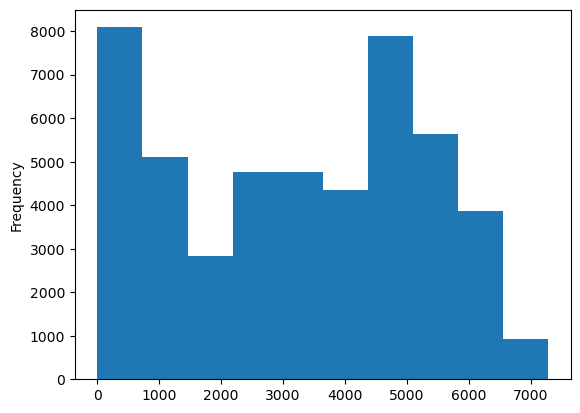

In [27]:
data['traffic_volume'].plot.hist()
plt.show()

In [28]:
data['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Traffic volume

+-------------+----------+
| statistic   |   values |
|-------------+----------|
| count       |    48204 |
| mean        |  3259.82 |
| std         |  1986.86 |
| min         |        0 |
| 25%         |     1193 |
| 50%         |     3380 |
| 75%         |     4933 |
| max         |     7280 |
+-------------+----------+


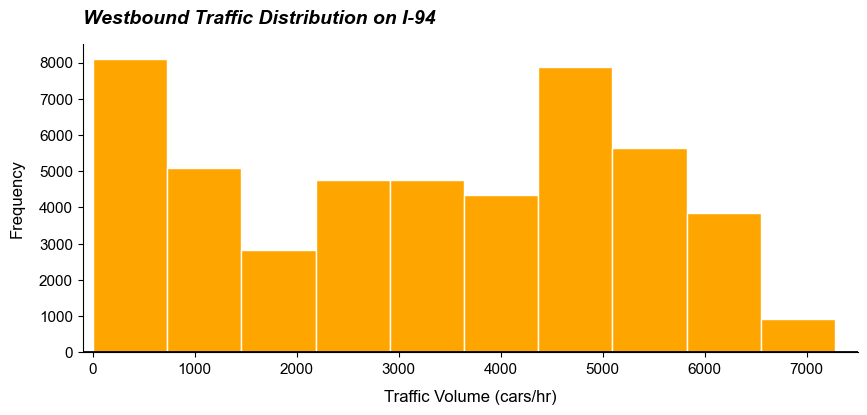

In [34]:
table = (data['traffic_volume'].describe()).to_frame()
print(tabulate(table, headers= ['statistic', 'values'], tablefmt='psql', numalign="right"))

## Generate an histogram graph
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
with sns.axes_style("darkgrid"):
    plt.hist(data["traffic_volume"],color="orange")
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic Distribution on I-94', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 
    plt.show()




TRAFFIC VALUE : DAY vs NIGHT

In [41]:
import datetime
print(datetime.datetime.now())

2024-11-21 14:10:02.548584


In [43]:
data["date_time"] = pd.to_datetime(data["date_time"],errors="coerce")

In [46]:
day = data.copy()[(data["date_time"].dt.hour >= 7) & (data["date_time"].dt.hour < 19)]
night = data.copy()[(data["date_time"].dt.hour >= 19) | (data["date_time"].dt.hour < 7)]

print('Our daytime data has: {:,} rows and {} columns'.format(day.shape[0], day.shape[1]))
print('Our nighttime data has: {:,} rows and {} columns'.format(night.shape[0], night.shape[1]))

Our daytime data has: 9,423 rows and 9 columns
Our nighttime data has: 9,511 rows and 9 columns


+-------+-----------+-------------+
|       |   daytime |   nighttime |
|-------+-----------+-------------|
| count |      9423 |        9511 |
| mean  |   4769.18 |     1780.65 |
| std   |   1151.75 |      1429.8 |
| min   |       677 |           1 |
| 25%   |      4242 |         538 |
| 50%   |      4815 |        1306 |
| 75%   |      5556 |        2793 |
| max   |      7280 |        6247 |
+-------+-----------+-------------+


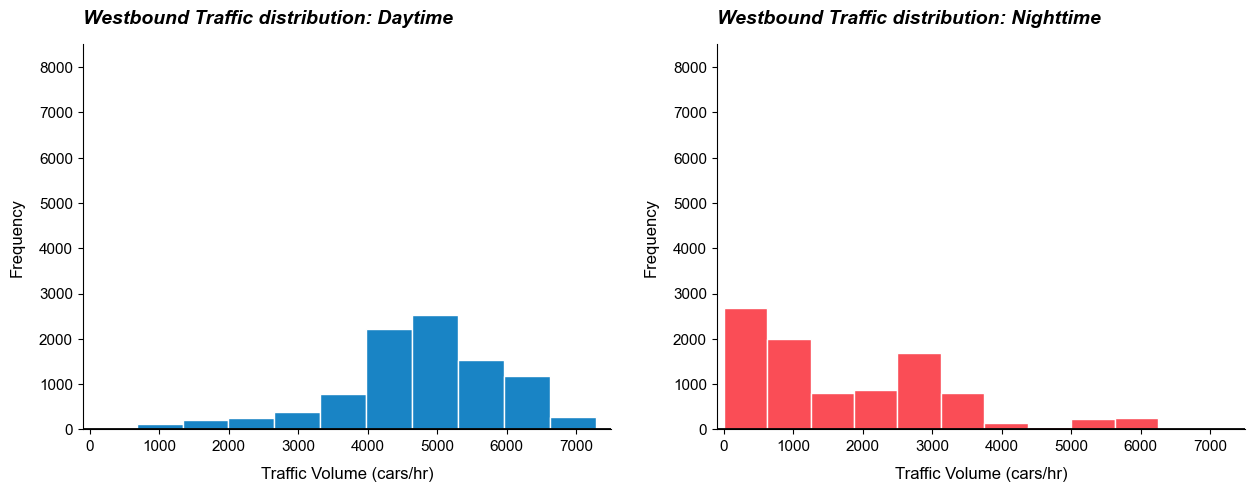

In [51]:
day_desc = day[['traffic_volume']].describe()
night_desc = night[['traffic_volume']].describe()
merge_desc = pd.concat([day_desc,night_desc],axis=1)

print(tabulate(merge_desc, headers= ['','daytime','nighttime'], tablefmt='psql', numalign="right"))

plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
with sns.axes_style("darkgrid"):
    plt.hist(day["traffic_volume"],color="#1984c5")
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic distribution: Daytime', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 
plt.subplot(1,2,2)
with sns.axes_style("darkgrid"):
    plt.hist(night["traffic_volume"],color='#fa4d56')
    plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize='12')
    plt.ylabel('Frequency', labelpad=10, fontsize='12')
    plt.title('Westbound Traffic distribution: Nighttime', loc='left', fontstyle='italic', pad=15, fontsize=14, fontweight='bold')
    plt.grid(False)
    plt.xlim(-100,7500)
    plt.ylim(0,8500)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.tick_params(direction='out')
    sns.despine()
    plt.axhline(y = 0, color = 'black', linestyle = '-', linewidth=2) 
    plt.show()

Observations¶
Daytime Traffic:

The distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high and lies in the range of 4,000 to 6,500 cars/hr.

Nighttime Traffic:

The nighttime data is right skewed, indicating an opposite pattern to daytime trends. At night, higher traffic volumes are less common.

TIME INDICATOR

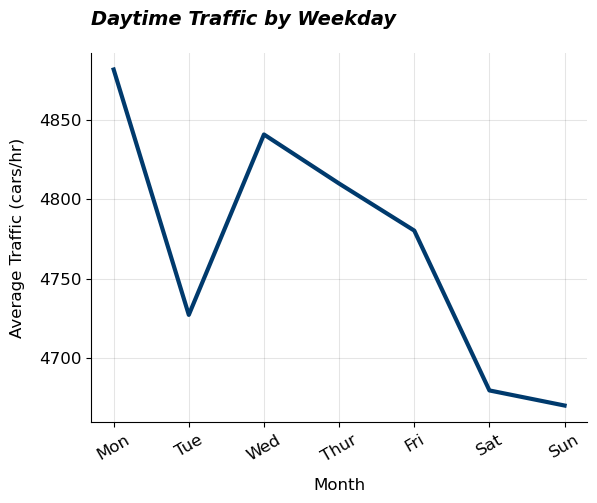

In [52]:
day["dayofweek"] = day["date_time"].dt.dayofweek

weekday_traffic = (day.groupby("dayofweek")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )

plt.plot(weekday_traffic["dayofweek"], weekday_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Daytime Traffic by Weekday', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(0,7), rotation=30, 
                   labels=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.show()


Observation¶
Traffic volume is significantly heavier on working days (Monday – Friday) with average traffic volumes around 5,000 cars/hr. Traffic is lighter on weekends (less than 4,000 cars/hr).

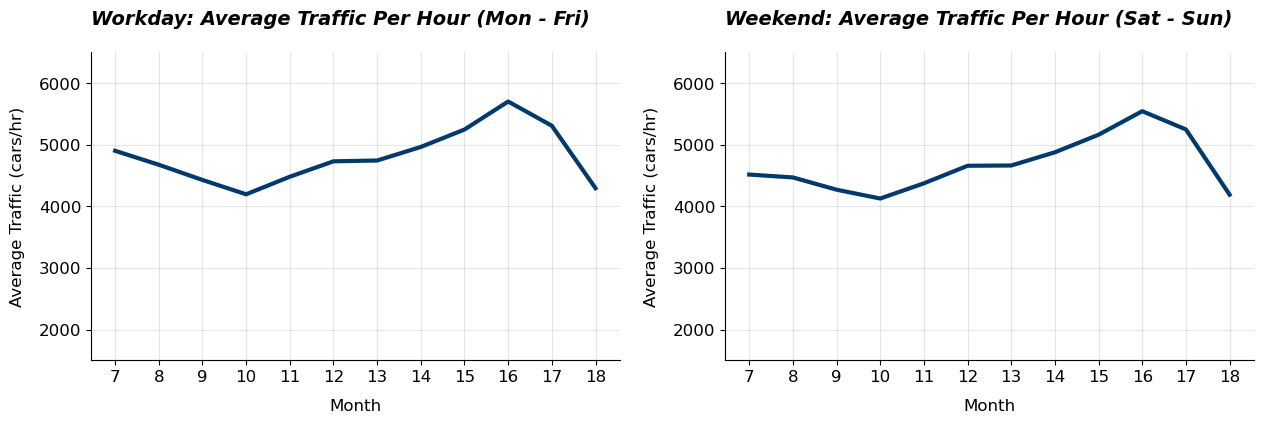

In [53]:
day["hour"] = day["date_time"].dt.hour
workday = day.copy()[day["dayofweek"] <= 4]
weekend = day.copy()[day["dayofweek"] >= 5]

workday_traffic = (workday.groupby("hour")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )

weekend_traffic = (weekend.groupby("hour")["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )


plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
plt.plot(workday_traffic["hour"], workday_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Workday: Average Traffic Per Hour (Mon - Fri)', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1500,6500])
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(7,19))

plt.subplot(1,2,2)
plt.plot(weekend_traffic["hour"], weekend_traffic['avg_traffic'], color= '#003a6d', linewidth=3)
plt.title('Weekend: Average Traffic Per Hour (Sat - Sun)', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.xlabel('Month', fontsize=12, labelpad=10)
plt.ylabel('Average Traffic (cars/hr)', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim([1500,6500])
plt.grid(True, color='black', alpha=0.1)
sns.despine()
plt.xticks(range(7,19))

plt.show()


WEATHER INDICATOR

Our dataset provides us with a few useful columns about weather. Some of these columns are numerical while the others are categorical:

Numerical columns: temp, rain_1h, snow_1h and clouds_all.

Categorical columns: weather_main and weather_description.

In [54]:
day[['temp','rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']].corr()['traffic_volume']

temp              0.083173
rain_1h           0.006821
snow_1h           0.016846
clouds_all       -0.000334
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

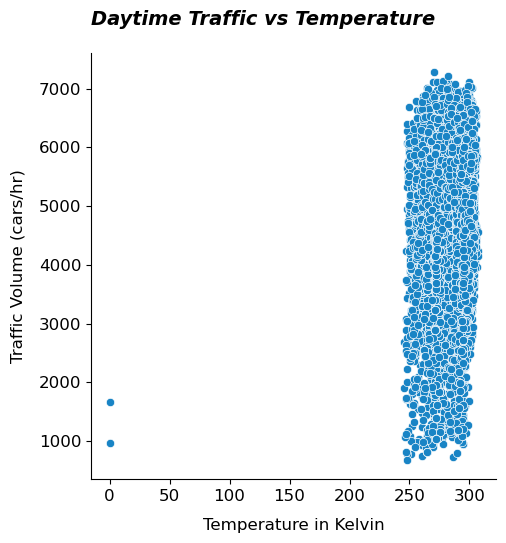

In [57]:
sns.relplot(data=day, x='temp', y="traffic_volume", color='#1984c5')
plt.title('Daytime Traffic vs Temperature', fontstyle='italic', fontweight='bold', fontsize=14, pad=20, loc='left')
plt.ylabel('Traffic Volume (cars/hr)',fontsize=12, labelpad=10)
plt.xlabel('Temperature in Kelvin', fontsize=12, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Categorical Weather Indicators

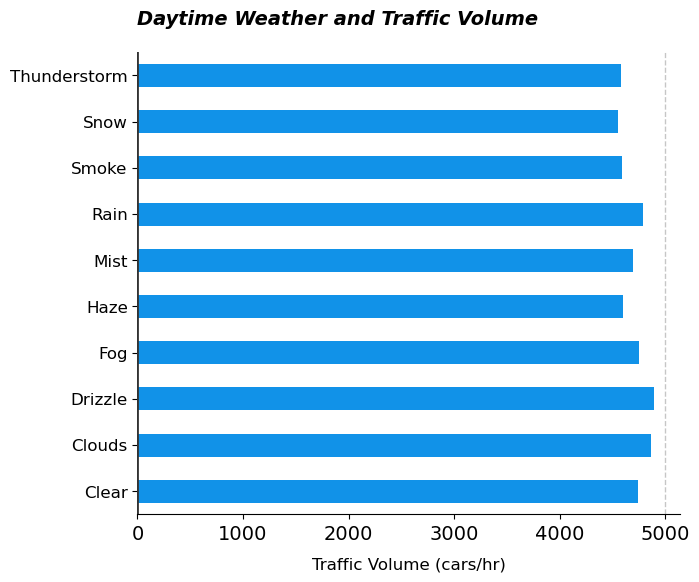

In [63]:
weather_type = (day.groupby('weather_main')["traffic_volume"]
                     .mean()
                     .reset_index(name= 'avg_traffic')
             )
bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in weather_type['avg_traffic']]
weather_type.plot.barh(y='avg_traffic', x='weather_main', legend=None, color=bar_color, figsize = (7,6))
plt.title('Daytime Weather and Traffic Volume', fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
plt.ylabel(None)
plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)
plt.show()

In [ ]:
observation

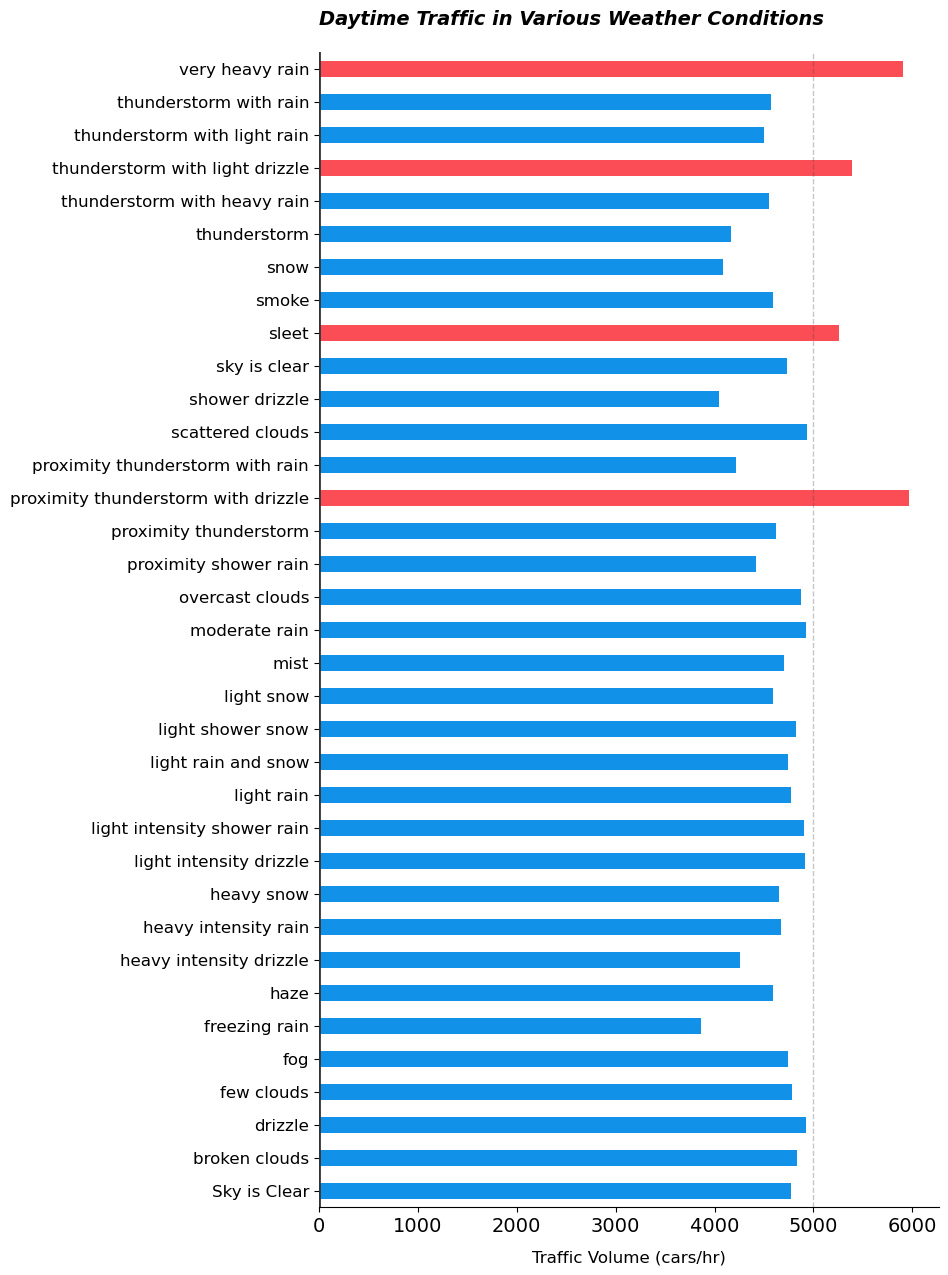

In [67]:
weather_desc = (day.groupby('weather_description')["traffic_volume"].mean().reset_index(name= 'avg_traffic'))
bar_color = ['#1192e8' if (x < 5000) else '#fa4d56' for x in weather_desc['avg_traffic']]
weather_desc.plot.barh(y='avg_traffic', x='weather_description', legend=None, color=bar_color, figsize = (8,15))
plt.title('Daytime Traffic in Various Weather Conditions', fontsize=14, fontweight='bold', pad=20, loc='left', fontstyle='italic')
plt.ylabel(None)
plt.xlabel('Traffic Volume (cars/hr)', labelpad=10, fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
sns.despine(left=True)
plt.axvline(x = 0, color = '#333', linestyle = '-', linewidth=2)
plt.axvline(x = 5000, color = '#444', linestyle = '--', linewidth=1, alpha=0.3)
plt.show()


Observation
It looks like there are three weather types where traffic volume exceeds 5,000:

Shower snow
Light rain and snow
Proximity thunderstorm with drizzle
These situations point to bad weather. In bad weather, people may prefer to commute through cars for safety reasons, rather than using alternatives like bikes or long walks.

Conclusion
In this project, I tried to find a few indicators of heavy traffic on the I-94 Interstate highway. I managed to find two types of indicators:

Time indicators->
The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
The traffic is usually heavier on business days compared to the weekends.
On business days, the rush hours are around 7 and 16.
Weather indicators=>
Shower snow
Light rain and snow
Proximity thunderstorm with drizzle